# Equação da Condução de Calor

A conservação de calor pode ser usada para desenvolver um balanço de calor para um elemento infinitesimal em uma barra isolada longa e fina. Entretanto, em vez de examinar o caso estacionário, o balanço presente também considerará as quantidades de calor armazenadas no elemento em um periodo $\Delta t$. Logo, o balanço é da seguinte forma, entradas - saídas = armazenado, ou

$$ q(x)\Delta y \Delta z \Delta t - q(x + \Delta x) \Delta y \Delta z \Delta t  = \Delta x \Delta y \Delta z \rho C \Delta T $$

Dividindo pelo volume do elemento ($= \Delta x \Delta y \Delta z $) e $\Delta t$, obtemos

$$ \cfrac{q(x) - q(x + \Delta x)}{\Delta x} = \rho C \cfrac{\Delta T}{\Delta t} $$

Tomando o limite, temos

$$ - \cfrac{\partial q}{\partial x} = \rho C \cfrac{\partial T}{\partial t} $$

Substituindo a lei de condução de calor de Fourier, obtemos

\begin{equation}\label{eq:condcaldif}
 k\cfrac{\partial^2 T}{\partial x^2} = \cfrac{\partial T}{\partial t}
\end{equation}

que é a equação da condução de calor.

# Método das Diferenças Finitas

O método das diferenças finitas (MDF) é um método de resolução de equações diferenciais que se baseia na aproximação de derivadas por diferenças finitas. A fórmula de aproximação obtém-se da série de Taylor da função derivada. Hoje, os MDFs são a abordagem dominante das soluções numéricas de equações diferenciais parciais. 

O operador de diferenças finitas para derivada pode ser obtido a partir da série de Taylor para as seguintes funções:

$$ f(x+h) = f(x) + f'(x)h + \cfrac{f''(x)h^2}{2} + \cfrac{f'''(x)h^3}{6} + o(h^4) $$

e

$$ f(x-h) = f(x) - f'(x)h + \cfrac{f''(x)h^2}{2} - \cfrac{f'''(x)h^3}{6} + o(h^4) $$

Portanto, a derivada primeira pode ser escrita de três formas distintas como uma diferença dividida mais um termo de erro, obtido ao desprezar-se termos de ordem superior:

$$ f'(x) = \cfrac{f(x+h) - f(x)}{h} + o(h) $$

que é conhecida como fórmula das diferenças progressivas, ou

$$ f'(x) = \cfrac{f(x) - f(x+h)}{h} + o(h) $$

que é conhecida como fórmula das diferenças regressivas, ou ainda

$$ f'(x) = \cfrac{f(x+h) - f(x-h)}{2h} + o(h^2) $$

que é conhecida como fórmula das diferenças centradas.

Além disso, é possível obter derivadas de ordem superior. A derivada de segunda ordem é obtida a partir de

$$ f(x+h) + f(x-h) = 2f(x) + f''(x)h^2 + o(h^4) $$

e é dada por

$$ f''(x) = \cfrac{f(x+h) - 2f(x) + f(x-h)}{h^2} + o(h^2) $$

que é o método das diferenças finitas para equações diferenciais de segunda ordem, e pode ser aplicado a EDPs, como a de Laplace e a de condução de calor.

## MDF para a Equação da Condução de Calor

Do mesmo modo que com as EDPs elípticas, as equações parabólicas podem ser resolvidas substituindo-se as derivadas parciais por diferenças divididas finitas. Entretanto, em contraste com as EDPs elípticas, devemos agora considerar variações no tempo, bem como no espaço. Por causa de sua natureza variável no tempo, a solução dessas equações envolve diversas questões novas, em particular, a estabilidade.

A equação de condução de calor exige aproximações para a segunda derivada no
espaço e para a primeira derivada no tempo. A primeira é representada da mesma
maneira que na equação de Laplace, por uma diferença dividida finita centrada:

$$ \cfrac{\partial^2 T}{\partial x^2} = \cfrac{T^{l}_{i+1} - 2T^{l}_i + 
T^{l}_{i-1}}{\Delta x^2} $$

Uma diferença finita dividida progressiva é usada para obter uma aproximação da derivada no tempo

$$ \cfrac{\partial T}{\partial t} = \cfrac{T^{l+1}_{i} - T^{l}_{i}}{\Delta t} $$

Substituindo estas equações na equação da condução de calor, temos

$$ k \cfrac{T^{l}_{i+1} - 2 T^{l}_{i} + T^{l}_{i-1}}{(\Delta x)^2} =
\cfrac{T^{l+1}_{i} - T^{l}_{i}}{\Delta t} $$

que pode ser reescrita como

\begin{equation}\label{eq:condcalmdf}
 T^{l+1}_{i} = T^{l}_{i} + \lambda (T^{l}_{i+1} - 2 T^{l}_{i} + T^{l}_{i-1})
\end{equation}

sendo $\lambda = k \cfrac{\Delta t}{(\Delta x)^2}$.

Essa equação pode ser escrita para todos os nós interiores da barra. Ela fornece um meio explícito de calcular valores em cada nó para um instante futuro baseado nos valores atuais no nó e em seus vizinhos.

### Método Iterativo

Usando a equação iterativa descrita anteriormente na Introdução para equações parabólicas,

\begin{equation}
    \label{eq:calor_interativa}
    T^{l+1}_{i} = T^{l}_{i} + \lambda (T^{l}_{i+1} - 2 T^{l}_{i} + T^{l}_{i-1})
\end{equation}

com 

\begin{equation}
\label{eq:calor_lambda}
    \lambda = k \cfrac{\Delta t}{(\Delta x)^2}
\end{equation}

sendo $k$ uma constante que depende do material da barra.

Note que esta equação depende de um intervalo de tempo $\Delta t$ e do intervalo de comprimento $\Delta x$ definidos. Embora a  convergência da equação seja garantida, seus resultados podem flutuar bastante entre iterações, ou seja, sua estabilidade não é totalmente garantida. Para torná-la estável, o valor de $\lambda$ tem que ser menor que 0,5. Assim, deve-se ajustar $\Delta t$ e $\Delta x$ na equação adequadamente.


Foi desenvolvido um programa iterativo em Python, no qual desta vez é dada uma condição inicial para a temperatura da barra, suas condições de contorno e o usuário deve inserir os valores de $\Delta t$, $\Delta x$ e $k$. O programa fornece a distribuição de temperatura em cada intervalo de tempo, em saltos de $\Delta t$ para posições multiplas de $\Delta x$. O programa se encontra abaixo, e exemplificamos um resultado.

A barra de aço possui comprimento de 10cm, passo de 0.5cm, e a condução de calor teve 15 segundos de intervalo de tempo, com temperaturas iniciais de 100ºC a esquerda (constante), 50ºC a direita (constante), e 0ºC no interior da barra (variável).

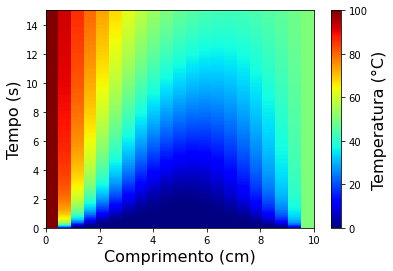

In [2]:
from MDF.calor import malha, solucao, colorplot
# ----------------------------------------------------------------- #
#                            PARÂMETROS                             #
# ----------------------------------------------------------------- #
L = 10  # [cm] Comprimento da barra
tf = 15  # [s] Instante final (aproximado)
dx = 0.5  # [cm] Passo de distância

# --- Propriedades do Material da Barra
# Aço: rho = 7800 kg/m3, k =  52 W/(m·K), c = 486 J/(kg·K)
#  Al: rho = 2697 kg/m3, k = 237 W/(m·K), c = 900 J/(kg·K)

# rho = 2697;             #    [kg/m3] Massa específica
# k = 237;                #  [W/(m·K)] Condutividade térmica
# c = 900;                # [J/(kg·K)] Capacidade térmica específica
# alpha = k/(rho*c)       #   [m²/(s)] Difusibilidade térmica do material
alpha = 0.49 / (2.7 * 0.2174)  # [cm²/(s)] Difusibilidade térmica do material (dado Chapra, 2016)

# --- Passo de Tempo
# lamb = 1/10;
lamb = 1 / 6  # Valor mínimo que garante a convergência e estabilidade da solução (Chapra, 2016)
# lamb = 1/2             # Valor mínimo que garante a convergência da solução
dt = lamb * dx ** 2 / alpha  # Passo de em função de lambda

# TEMPERATURAS
Tesq = 100 # esquerda
Tdir = 50 # direita
valor = [Tesq, Tdir]
fluxo = [False, False]
# ----------------------------------------------------------------- #
#                     CONSTRUÇÃO DA MALHA                           #
# ----------------------------------------------------------------- #

T = malha(L, dx, tf, dt, valor, fluxo)

# ----------------------------------------------------------------- #
#                              SOLUÇÃO                              #
# ----------------------------------------------------------------- #

T = solucao(T, dx, lamb, valor, fluxo)

# ----------------------------------------------------------------- #
#                               PLOTS                               #
# ----------------------------------------------------------------- #

colorplot(L, T, tf)